In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import json

In [22]:
players_df = pd.read_csv("players_stats_by_season_full_details.csv")
players2 = players_df[["Player", "League", "Team", "GP", "MIN", "FGM", "FGA","3PM","ORB","DRB","REB","AST","STL","BLK","PTS","height_cm"]]
players_df

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,...,"Mar 6, 1972",7-1,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,95,...,"Jan 26, 1977",6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,2,...,"Jul 24, 1963",6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,89,...,"Jun 7, 1975",6-0,183.0,165.0,75.0,United States,Bethel High School,1.0,1.0,Philadelphia Sixers
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,177,...,"Jul 23, 1968",6-4,193.0,180.0,82.0,United States,Skyline High School,1.0,2.0,Seattle SuperSonics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53944,Ukrainian-Superleague,2019 - 2020,International,Kyrylo Meshheryakov,MYK,15,127.0,7,28,2,...,"Aug 17, 1995",6-6,198.0,182.0,83.0,Ukraine,NaN,NaN,NaN,NaN
53945,Ukrainian-Superleague,2019 - 2020,International,Yaroslav Kadygrob,ODE,10,81.7,5,16,4,...,"Oct 28, 1991",6-3,191.0,187.0,85.0,Ukraine,NaN,NaN,NaN,NaN
53946,Ukrainian-Superleague,2019 - 2020,International,Ernesto Tkachuk,ODE,16,124.7,1,15,0,...,"Sep 17, 1994",6-2,188.0,200.0,91.0,Ukraine,NaN,NaN,NaN,NaN
53947,Ukrainian-Superleague,2019 - 2020,International,Andrij Shapovalov,KHAR,12,59.2,0,8,0,...,"Nov 10, 1993",6-2,188.0,171.0,78.0,Ukraine,NaN,NaN,NaN,NaN


In [5]:
print(players2.columns)
player_names = players2["Player"]
print(player_names)
player_names[123]

Index(['Player', 'Team', 'GP', 'MIN', 'FGM', 'FGA', '3PM', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'height_cm'],
      dtype='object')
0           Shaquille O'Neal
1               Vince Carter
2                Karl Malone
3              Allen Iverson
4                Gary Payton
                ...         
53944    Kyrylo Meshheryakov
53945      Yaroslav Kadygrob
53946        Ernesto Tkachuk
53947      Andrij Shapovalov
53948      Dmitriy Lypovtsev
Name: Player, Length: 53949, dtype: object


'Eric Snow'

In [23]:
players2.dropna()
nba_df = players2.loc[(players2["League"] == "NBA") & (players2["PTS"] > 700)]
nba_df

,Player,League,Team,GP,MIN,FGM,FGA,3PM,ORB,DRB,REB,AST,STL,BLK,PTS,height_cm
0,Shaquille O'Neal,NBA,LAL,79,3163.0,956,1665,0,336,742,1078,299,36,239,2344,216.0
1,Vince Carter,NBA,TOR,82,3126.0,788,1696,95,150,326,476,322,110,92,2107,198.0
2,Karl Malone,NBA,UTA,82,2947.0,752,1476,2,169,610,779,304,79,71,2095,206.0
3,Allen Iverson,NBA,PHI,70,2853.0,729,1733,89,71,196,267,328,144,5,1989,183.0
4,Gary Payton,NBA,SEA,82,3425.0,747,1666,177,100,429,529,732,153,18,1982,193.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51816,Doug McDermott,NBA,IND,69,1372.3,267,547,128,26,148,174,78,12,5,710,203.0
51817,Joe Ingles,NBA,UTA,72,2136.6,246,553,141,27,251,278,373,65,11,707,203.0
51818,Bryn Forbes,NBA,SAS,63,1579.3,242,581,148,12,114,126,108,33,0,707,191.0
51819,Dario Saric,NBA,PHX,66,1631.8,256,538,84,100,306,406,123,37,16,704,208.0


In [19]:
nba_df.shape

(2550, 16)

In [ ]:
#takaing out values
#df.drop()
#df.drop(row1:row2:row3) gets rid of those three rows

In [24]:
#correlation
nba_df.corr()

,GP,MIN,FGM,FGA,3PM,ORB,DRB,REB,AST,STL,BLK,PTS,height_cm
GP,1.000000,0.501173,0.144570,0.151995,-0.006446,0.154611,0.144604,0.156776,0.086895,0.185113,0.093081,0.122903,0.004521
MIN,0.501173,1.000000,0.688969,0.707158,0.132918,0.198219,0.375731,0.334921,0.430265,0.528641,0.169171,0.682074,-0.015437
FGM,0.144570,0.688969,1.000000,0.951902,0.122648,0.221915,0.418414,0.373388,0.355038,0.364244,0.207503,0.966406,0.077588
FGA,0.151995,0.707158,0.951902,1.000000,0.283004,0.045236,0.268325,0.204898,0.426130,0.433122,0.057439,0.953087,-0.066062
3PM,-0.006446,0.132918,0.122648,0.283004,1.000000,-0.607278,-0.337585,-0.453677,0.248176,0.201923,-0.420469,0.261684,-0.396344
ORB,0.154611,0.198219,0.221915,0.045236,-0.607278,1.000000,0.755167,0.887274,-0.327497,-0.106590,0.682134,0.109030,0.655308
DRB,0.144604,0.375731,0.418414,0.268325,-0.337585,0.755167,1.000000,0.972399,-0.116277,0.037295,0.670897,0.344937,0.641917
REB,0.156776,0.334921,0.373388,0.204898,-0.453677,0.887274,0.972399,1.000000,-0.198379,-0.011697,0.714844,0.281509,0.684904
AST,0.086895,0.430265,0.355038,0.426130,0.248176,-0.327497,-0.116277,-0.198379,1.000000,0.563432,-0.272797,0.406775,-0.564039
STL,0.185113,0.528641,0.364244,0.433122,0.201923,-0.106590,0.037295,-0.011697,0.563432,1.000000,-0.104554,0.402327,-0.352424


<AxesSubplot:>

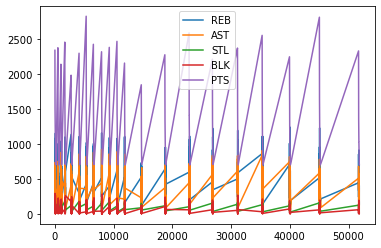

In [28]:
#PLotting
#df.plot()
nba_df[["REB","AST","STL","BLK","PTS"]].plot()